# Advanced data mining and analysis in Python 

## Exercise number 2:
#### Name: Einav Diar
#### ID Num: 319010807

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Load the data:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')

c:\users\einav\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Presenting the data:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


#### Question 1:

In [4]:
#I checked whether the event_time column is defined as "pd.to_datetime"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   event_time     object
 1   event_type     object
 2   product_id     int64 
 3   category_id    int64 
 4   category_code  object
 5   brand          object
 6   price          object
 7   user_id        int64 
 8   user_session   object
dtypes: int64(3), object(6)
memory usage: 318.3+ MB


In [5]:
#I used the "pd.to_datetime" method to calculate the time in seconds:
data['event_time']= pd.to_datetime(data['event_time'])

# I calculated the duration till the next event by user_session:
data['duration_to_next_event'] = data.groupby('user_session')['event_time'].shift(-1) - data['event_time']

# For the last event in visit,I set the value to 0:
data.loc[data.groupby('user_session').tail(1).index, 'duration_to_next_event'] = 0

In [6]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0 days 00:00:23
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:15
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0 days 00:00:45
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0 days 00:01:43
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:00


#### Question 2:

In [7]:
# I sorted the dataframe by user_id and visit_date:
data.sort_values(['user_id', 'event_time'])

# I created a series that contain the time differences between visits for each user:
time_difference = data.groupby('user_id')['event_time'].diff()

# I created a series that contain the start date of each funnel:
funnel_starts = (time_difference >= pd.Timedelta(days=5)) | time_difference.isna()

# I created a series that contain the funnel numbers based on funnel_starts:
funnel_numbers = funnel_starts.groupby(data['user_id']).cumsum()
data['funnel_number'] = funnel_numbers

In [8]:
#I cheched the values in funnel_number column:
data['funnel_number'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [9]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0 days 00:00:23,1
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:15,1
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0 days 00:00:45,1
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0 days 00:01:43,1
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:00,1


In [10]:
#Double check:
(data.iloc[np.where(data['user_id']==457678989)])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
2636608,2019-11-20 11:26:05+00:00,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0 days 00:00:41,1
2636707,2019-11-20 11:26:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0 days 00:01:56,1
2636997,2019-11-20 11:28:42+00:00,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,fe6aca50-b6a5-4acd-bb15-0b5d0c76a19e,0,1
4635787,2019-11-30 23:58:15+00:00,view,5873612,1487580009496313889,NaN,NaN,5.56,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0 days 00:01:31,2
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,4.76,457678989,ee50b160-a4db-4722-8751-6812c5b38295,0,2


#### Question 3:

In [11]:
# I sorted the data by user_id, user_session and visit_date:
data.sort_values(['user_id', 'user_session', 'event_time'], inplace=True)

# I created a series that group the data by user_id and funnel_number:
grouped = data.groupby(['user_id', 'funnel_number'])

# I created a series that count the funnel numbers based on user_session:
data['index_in_funnel'] = grouped['user_session'].transform(lambda x: (x != x.shift()).cumsum())

In [12]:
data.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:03,1,1
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0 days 00:00:04,1,1
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0,1,1
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0,1,1
4635836,2019-11-30 23:59:58+00:00,view,5880201,2029731308699124089,NaN,rasyan,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b,0,1,1


#### Question 4:

In [13]:
# I checked how many variables in the "price" column are defined as a string
print(data['price'].apply(type).value_counts())

<class 'float'>    4570301
<class 'str'>        65536
Name: price, dtype: int64


In [14]:
# I have removed any non numeric characters from the price column:
data['price'] = data['price'].str.extract('([0-9]+\.[0-9]+)').astype(float)

In [15]:
# I checked whether all the variables became floats
print(data['price'].apply(type).value_counts())

<class 'float'>    4635837
Name: price, dtype: int64


#### Question 5:

In [16]:
#Showing the types of events that exist in my data:
data['event_type'].unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

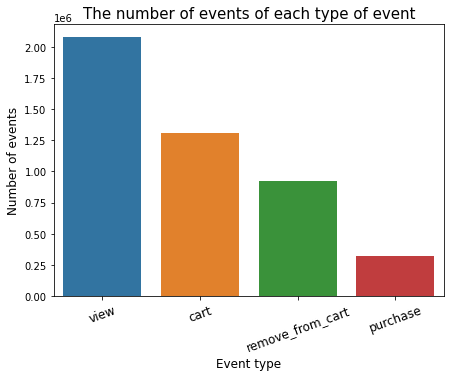

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(x='event_type', data=data)
plt.title("The number of events of each type of event", fontsize=15)
plt.xticks(rotation=20, fontsize=12)
plt.xlabel("Event type", fontsize=12)
plt.ylabel("Number of events", fontsize=12)    
plt.show()

In [18]:
#The exact number of events of each type
data['event_type'].value_counts()

view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: event_type, dtype: int64

#### Question 6:

In [19]:
# I created the new data frame and insert the old columns:
session_data = pd.DataFrame()
session_data['user_id'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_id'].reset_index(drop=True)
session_data['user_session'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_session'].reset_index(drop=True)
session_data['funnel_number'] = data.drop_duplicates(subset=['user_id', 'user_session'])['funnel_number'].reset_index(drop=True)
session_data['index_in_funnel'] = data.drop_duplicates(subset=['user_id', 'user_session'])['index_in_funnel'].reset_index(drop=True)

# I created the new columns:
session_data['number_of_events'] = data.groupby(['user_id', 'user_session'])['event_time'].count().reset_index(drop=True)
session_data['duration_time'] = data.groupby(['user_id', 'user_session'])['event_time'].max().reset_index(drop=True) - data.groupby(['user_id', 'user_session'])['event_time'].min().reset_index(drop=True)
session_data['list_of_viewed'] = data[data['event_type'] == 'view'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
session_data['list_of_added_to_cart'] = data[data['event_type'] == 'cart'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
session_data['list_of_purchased'] = data[data['event_type'] == 'purchase'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)

In [20]:
session_data.head()

,user_id,user_session,funnel_number,index_in_funnel,number_of_events,duration_time,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0 days 00:00:00,[5240],"[5745712, 49674, 5587748, 4590, 34763]","[5812033, 5724621, 5809910, 5811668]"
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,1,1.0,0 days 00:00:00,[5814066],[5569506],"[5766379, 5614842]"
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,2,28.0,0 days 01:03:09,"[5800358, 5800349, 5800349, 5800358, 5712576, ...","[5896421, 5841190, 5896422, 5896419]","[5809910, 5809911, 5809912, 5862544, 5870648, ..."
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,3,1.0,0 days 00:00:00,[5711087],"[5896421, 5896422]","[5850620, 5850625, 5850621, 5850619, 5816166, ..."
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,4,1.0,0 days 00:00:00,[5711145],"[5811668, 5811668, 5724608, 5724658, 5724658, ...","[5846442, 5686083]"
